In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data_path = "../data"   # make sure this path matches your folder

all_data = []

for file in os.listdir(data_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(data_path, file))
        stock_name = file.replace(".csv", "")
        df["Stock"] = stock_name
        all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)

combined_df.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Stock,Company Name,Industry,ISIN Code
0,2007-11-27,MUNDRAPORT,EQ,440.0,770.0,1050.0,770.0,959.0,962.9,984.72,27294366,2687719053785000.0,NaN,9859619,0.3612,ADANIPORTS,NaN,NaN,NaN
1,2007-11-28,MUNDRAPORT,EQ,962.9,984.0,990.0,874.0,885.0,893.9,941.38,4581338,431276530165000.0,NaN,1453278,0.3172,ADANIPORTS,NaN,NaN,NaN
2,2007-11-29,MUNDRAPORT,EQ,893.9,909.0,914.75,841.0,887.0,884.2,888.09,5124121,455065846265000.0,NaN,1069678,0.2088,ADANIPORTS,NaN,NaN,NaN
3,2007-11-30,MUNDRAPORT,EQ,884.2,890.0,958.0,890.0,929.0,921.55,929.17,4609762,428325662830000.0,NaN,1260913,0.2735,ADANIPORTS,NaN,NaN,NaN
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.0,922.0,980.0,969.3,965.65,2977470,287519974300000.0,NaN,816123,0.2741,ADANIPORTS,NaN,NaN,NaN


In [3]:
combined_df = combined_df[["Date", "Stock", "Close"]]

combined_df["Date"] = pd.to_datetime(combined_df["Date"])

combined_df = combined_df.sort_values(["Stock", "Date"])

combined_df.head()


,Date,Stock,Close
0,2007-11-27,ADANIPORTS,962.9
1,2007-11-28,ADANIPORTS,893.9
2,2007-11-29,ADANIPORTS,884.2
3,2007-11-30,ADANIPORTS,921.55
4,2007-12-03,ADANIPORTS,969.3


In [4]:
combined_df["Return"] = combined_df.groupby("Stock")["Close"].pct_change()

combined_df.head()


,Date,Stock,Close,Return
0,2007-11-27,ADANIPORTS,962.9,NaN
1,2007-11-28,ADANIPORTS,893.9,-0.071659
2,2007-11-29,ADANIPORTS,884.2,-0.010851
3,2007-11-30,ADANIPORTS,921.55,0.042242
4,2007-12-03,ADANIPORTS,969.3,0.051815


In [5]:
returns_df = combined_df.pivot_table(
    index="Date",
    columns="Stock",
    values="Return",
    aggfunc="mean"
)

returns_df.head()


Stock,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,CIPLA,...,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,VEDL,WIPRO,ZEEL
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,NaN,0.010219,0.005618,NaN,NaN,-0.052217,NaN,-0.07201,-0.003105,0.005421,...,-0.039446,-0.010823,NaN,NaN,-0.053308,NaN,NaN,-0.014181,0.080005,0.068393
2000-01-05,NaN,-0.006614,-0.020484,NaN,NaN,-0.072765,NaN,-0.028475,-0.025512,-0.020611,...,0.024256,0.03813,NaN,NaN,-0.061058,NaN,NaN,-0.006103,0.016298,-0.066712
2000-01-06,NaN,-0.01436,-0.013308,NaN,NaN,0.014574,NaN,0.056536,0.068475,-0.05519,...,0.041501,0.074737,NaN,NaN,0.080202,NaN,NaN,0.046491,-0.019347,-0.051931
2000-01-07,NaN,0.021722,-0.044316,NaN,NaN,-0.051934,NaN,-0.001183,0.079997,-0.079876,...,0.080144,0.021991,NaN,NaN,-0.02107,NaN,NaN,-0.02347,-0.07999,-0.079968
2000-01-10,NaN,0.075966,0.008065,NaN,NaN,0.0,NaN,0.013426,0.075074,-0.033385,...,0.078991,0.059901,NaN,NaN,-0.009908,NaN,NaN,0.021459,0.001353,-0.058027


In [6]:
if "NIFTY50_all" in returns_df.columns:
    returns_df = returns_df.drop(columns=["NIFTY50_all"])

returns_df.columns


Index(['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV',
       'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA',
       'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK',
       'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'MARUTI', 'MM',
       'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN',
       'SHREECEM', 'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM',
       'TITAN', 'ULTRACEMCO', 'UPL', 'VEDL', 'WIPRO', 'ZEEL'],
      dtype='str', name='Stock')

In [7]:
returns_df = returns_df.clip(lower=-0.3, upper=0.3)

returns_df.describe()


Stock,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,CIPLA,...,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,VEDL,WIPRO,ZEEL
count,3321.0,5305.0,5305.0,3201.0,3200.0,5234.0,4773.0,5305.0,5304.0,5305.0,...,5305.0,5305.0,4138.0,3634.0,5305.0,4139.0,4286.0,5304.0,5305.0,5305.0
unique,3290.0,5277.0,5218.0,3196.0,3195.0,5108.0,4733.0,5288.0,5283.0,5275.0,...,5280.0,5277.0,4132.0,3632.0,5268.0,4135.0,4257.0,5242.0,5281.0,5260.0
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,22.0,23.0,52.0,6.0,4.0,69.0,26.0,10.0,17.0,22.0,...,19.0,13.0,5.0,3.0,28.0,4.0,18.0,28.0,15.0,25.0


In [8]:
portfolio_returns = returns_df.mean(axis=1)

portfolio_returns = pd.to_numeric(portfolio_returns, errors="coerce")

portfolio_returns.describe()


count    5305.000000
mean        0.000801
std         0.013524
min        -0.129367
25%        -0.005588
50%         0.001296
75%         0.007937
max         0.148970
dtype: float64

In [9]:
initial_capital = 100000

capital = (1 + portfolio_returns).cumprod() * initial_capital

capital.head(), capital.tail()


(Date
 2000-01-04    101090.001290
 2000-01-05     99634.150406
 2000-01-06    101809.696293
 2000-01-07    100933.298410
 2000-01-10    101070.706240
 dtype: float64,
 Date
 2021-04-26    4.222477e+06
 2021-04-27    4.269165e+06
 2021-04-28    4.320301e+06
 2021-04-29    4.339520e+06
 2021-04-30    4.305304e+06
 dtype: float64)

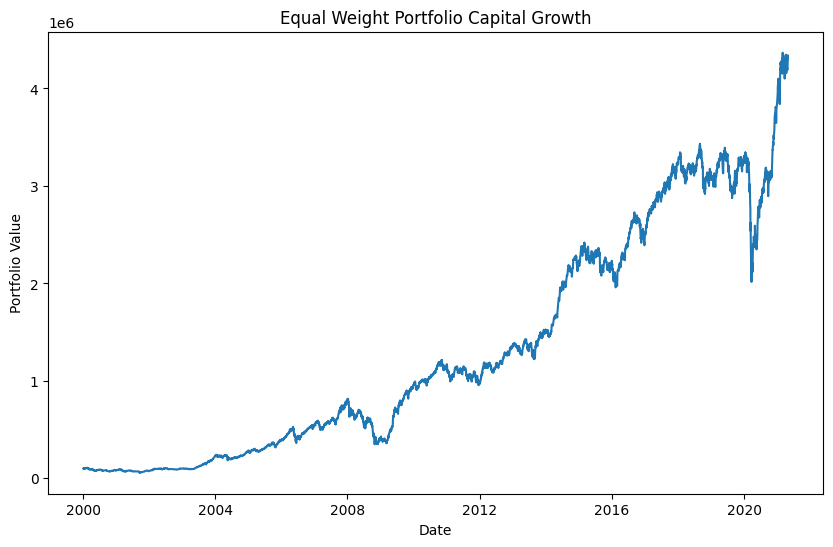

In [10]:
plt.figure(figsize=(10,6))
plt.plot(capital)
plt.title("Equal Weight Portfolio Capital Growth")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.show()


In [11]:
trading_days = 252

cagr = (capital.iloc[-1] / capital.iloc[0])**(trading_days/len(capital)) - 1
volatility = portfolio_returns.std() * np.sqrt(trading_days)
sharpe = (portfolio_returns.mean() * trading_days) / volatility

drawdown = capital / capital.cummax() - 1
max_drawdown = drawdown.min()

print("CAGR:", round(cagr, 4))
print("Volatility:", round(volatility, 4))
print("Sharpe Ratio:", round(sharpe, 4))
print("Max Drawdown:", round(max_drawdown, 4))


CAGR: 0.1951
Volatility: 0.2147
Sharpe Ratio: 0.9405
Max Drawdown: -0.5725
